In [ ]:
# Objective:
# To perform Analysis on the number of cases created in zendesk in last few months

In [32]:
# I was planning to use ticket.json endpoint, however this endpoint does not include query parameters to limit the search. 
# Need to use search api instead

In [33]:
#from urllib.parse import urlencode
try: # For python2
    import urlparse
    from urllib import urlencode
except: # For Python 3
    import urllib.parse as urlparse
    from urllib.parse import urlencode
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Section to add the variables
zd_addr="<Domain Name>.zendesk.com"
zd_user='<User name / Email-ID>'  + '/token'
zd_user_token="<Token>"

#Start and End date to plot the graph
start_dt='2023-02-01'
end_dt='2023-02-016'

In [36]:
params = {    
    'query': 'type:ticket status:open created>'+start_dt +' created<'+end_dt,
    'sort_by': 'created_at',
    'sort_order': 'desc',        # from oldest to newest
}


url = 'https://'+zd_addr+'/api/v2/search.json?' + urlencode(params)

In [37]:
response = requests.get(url, auth=(zd_user, zd_user_token))

if response.status_code != 200:
    print('Status:', response.status_code, 'Problem with the request. Exiting.')    
    exit()
# Print the subject of each ticket in the results

data = response.json()
df = pd.DataFrame(columns=['create_date']) # To store the data in df DataFrame for plotting later 
for result in data['results']:
    dt=pd.to_datetime(result['created_at'],format="%Y-%m-%d").date() # Convert string to datetime object
    row = pd.DataFrame({'create_date':[dt]}) # Convert datetime object in DataFrame
    df=pd.concat([df, row], axis=0,ignore_index=True) # Append row dataframe to df dataframe

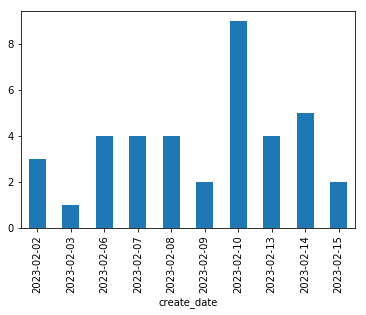

In [38]:
df_gb = df.groupby(['create_date']).size()
df_gb.plot(kind = 'bar')